In [1]:
# 1. 라이브러리 임포트 및 데이터 로드
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 타이타닉 데이터셋 로드
df = sns.load_dataset('titanic') 

# 실습에 사용할 연속형 변수만 추출
df_scale = df[['age', 'fare']].copy()

# 결측치 처리
df_scale['age'].fillna(df_scale['age'].median(), inplace=True)

# 데이터 확인
print("=== 1. 스케일링 대상 데이터셋 초기 상태 ===")
print(df_scale.head())
print(f"Age 평균: {df_scale['age'].mean():.2f}, Fare 평균: {df_scale['fare'].mean():.2f}")
print("-" * 50)

=== 1. 스케일링 대상 데이터셋 초기 상태 ===
    age     fare
0  22.0   7.2500
1  38.0  71.2833
2  26.0   7.9250
3  35.0  53.1000
4  35.0   8.0500
Age 평균: 29.36, Fare 평균: 32.20
--------------------------------------------------


In [2]:
# 2. 표준화 (Standardization) 실습

# 2-1. StandardScaler 객체 생성
scaler_standard = StandardScaler()

# 2-2. 데이터 학습 및 변환
# 데이터를 2차원 배열 형태로 변환하여 입력
df_standardized = scaler_standard.fit_transform(df_scale) 

# 결과 확인을 위해 DataFrame으로 변환
df_standardized = pd.DataFrame(df_standardized, columns=['Age_Standard', 'Fare_Standard'])


df_standardized.head()

,Age_Standard,Fare_Standard
0,-0.565736,-0.502445
1,0.663861,0.786845
2,-0.258337,-0.488854
3,0.433312,0.420730
4,0.433312,-0.486337


Age_Standard 평균: 0.00
Fare_Standard 표준편차: 1.00


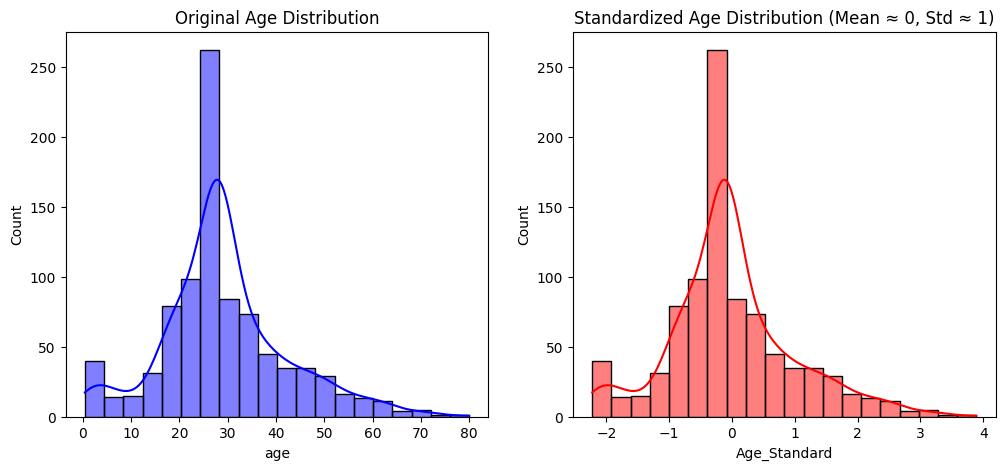

In [3]:
print(f"Age_Standard 평균: {df_standardized['Age_Standard'].mean():.2f}")
print(f"Fare_Standard 표준편차: {df_standardized['Fare_Standard'].std():.2f}")

# 표준화 결과 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_scale['age'], kde=True, bins=20, color='blue')
plt.title('Original Age Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df_standardized['Age_Standard'], kde=True, bins=20, color='red')
plt.title('Standardized Age Distribution (Mean ≈ 0, Std ≈ 1)')
plt.show()

In [4]:
# 3. 정규화 (Normalization / Min-Max Scaling) 실습

# 3-1. MinMaxScaler 객체 생성
scaler_minmax = MinMaxScaler()

# 3-2. 데이터 학습 및 변환 (fit_transform)
df_normalized = scaler_minmax.fit_transform(df_scale)

# 결과 확인을 위해 DataFrame으로 변환
df_normalized = pd.DataFrame(df_normalized, columns=['Age_MinMax', 'Fare_MinMax'])

df_normalized.head()

,Age_MinMax,Fare_MinMax
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


Age_MinMax 최소값: 0.00
Fare_MinMax 최대값: 1.00


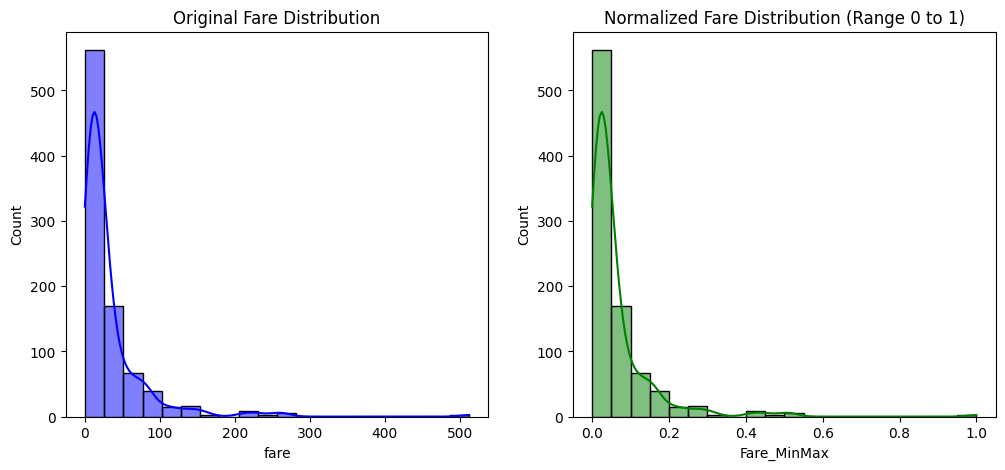

In [5]:
print(f"Age_MinMax 최소값: {df_normalized['Age_MinMax'].min():.2f}")
print(f"Fare_MinMax 최대값: {df_normalized['Fare_MinMax'].max():.2f}")

# 정규화 결과 시각화
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_scale['fare'], kde=True, bins=20, color='blue')
plt.title('Original Fare Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df_normalized['Fare_MinMax'], kde=True, bins=20, color='green')
plt.title('Normalized Fare Distribution (Range 0 to 1)')
plt.show()